![MLTrain logo](https://mltrain.cc/wp-content/uploads/2017/11/mltrain_logo-4.png "MLTrain logo")

---------------------------------------------------------

In [28]:
!wget -q -O changeNBLayout.py https://raw.githubusercontent.com/cmalliopoulos/PfBDAaML/master/changeNBLayout.py
!wget -q -O binTree.jpg https://raw.githubusercontent.com/cmalliopoulos/PfBDAaML/master/binTree.jpg
!wget -q -O kyphosis.csv https://raw.githubusercontent.com/cmalliopoulos/PfBDAaML/master/kyphosis.csv

In [1]:
%%capture --no-display
%run changeNBLayout.py

# Introduction and terminology #

In mathematical terms a ML problem is to learn (find) a function $y = f(x)$ from a set of input-output observations $(x, y)$ so that the function best represents the observations.  
The input-output observations are called "the training sample".  
The $x's$ are called input observations or inputs and the $y's$ output observations or outputs.  
The function is not arbitrary and it is always assumed to belong to a certain set usually refered to as __the model__.  
  
The model is specified by a set of __parameters__.  
For example, if I'm given a set of inputs and outputs in $\mathbb R$, I can try to fit $sin(\alpha x)$ to the outputs.  
My model is the set of all sinuses with zero initial phase and arbitrary frequency, specified by the parameter  
$\alpha$ - which must be greater or equal to 0.  
  
__Learning__ means to estimate the best model parameters from the observations in the trainset.  
It is therefore apparent that __model parameters are functions of the trainset__.  
In the above example $\alpha$ will be a function of the available $x's$ and $y's$. If a different set of observations  
is provided, the estimated (learned) value of $\alpha$ will change.

In an analytical model like the above the parameter is obvious. More advanced or 'algorithmic' models though require a bit of thought. Let's see it with an example:  

__Nearest-neighboor classifier:__  
NN algorithms classify a new $x$ to the class where the majority of the __nearest__ $x's$ from the trainset belong.  
Assume that I want to train a k-NN classifier ie, a NN classifier that takes into account the classes of the k nearest neighboors of an input point  
in order to decide where to classify $x$. What are the parameters of this model?

### Fitting error ###
Suppose that a candidate function has been selected from the model and let's denote by $\hat y$ the value generated 
by that function at $x$.  
To __learn $f$__ means to find the parameter values that minimize __an error__ over the pairs $(y, \hat y)$.  
  
In classification problems this error is usually a function assigning 1 to the pairs $y\neq\hat y$ and 0 otherwise.  
In regression problems the error is a positive function of the difference $y - \hat y$.

### Test sets and test error ###
After we have trained (or 'fitted' as we say) our model to the trainset, we must __test__ the performance of the model.  
This is done using a different set of observations that were __not used in the training phase__.  
Mind that 'learning' is the ability to __generalize__ that is, to provide acceptable predictions to __unseen__ data.  
It is therefore meaningless to test a model's performance on the data used to train its parameters.

-------------------------------------
# Decision-tree theory #


Classification and regression trees (CARTs) are devices that exploit a binary-tree structure to partition the input feature space into rectangles  
with edges formed by simple expressions of the form $X_j < a$ where $X_j$ is the $j^{th}$ feature in the input space.  

For those with a CS background, CARTs are similar to K-d trees however the purpose here is not to speedup search by balancing partition sizes but to minimize a __misclassification cost__.  
We will try to explain the splitting process with an example of a 2-class classifier and 2 features $X_1$ and $X_2$:

![binary tree regions](binTree.jpg "binTree")

# Imports #

In [7]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('kyphosis.csv')
print df.head()
print df.describe()

  Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15
              Age     Number      Start
count   81.000000  81.000000  81.000000
mean    83.654321   4.049383  11.493827
std     58.104251   1.619423   4.883962
min      1.000000   2.000000   1.000000
25%     26.000000   3.000000   9.000000
50%     87.000000   4.000000  13.000000
75%    130.000000   5.000000  16.000000
max    206.000000  10.000000  18.000000


`kyphosis.csv` is a record of the results of medical operations for kyphosis correction in toddlers and juveniles.  
`Kyphosis` field is the result of the operation (whether kyphosis was present or not after the operation).  
`Age` is the child's age in months.  
`Number` is the number of spinals affected and `Start` the lower starting spinal disk.

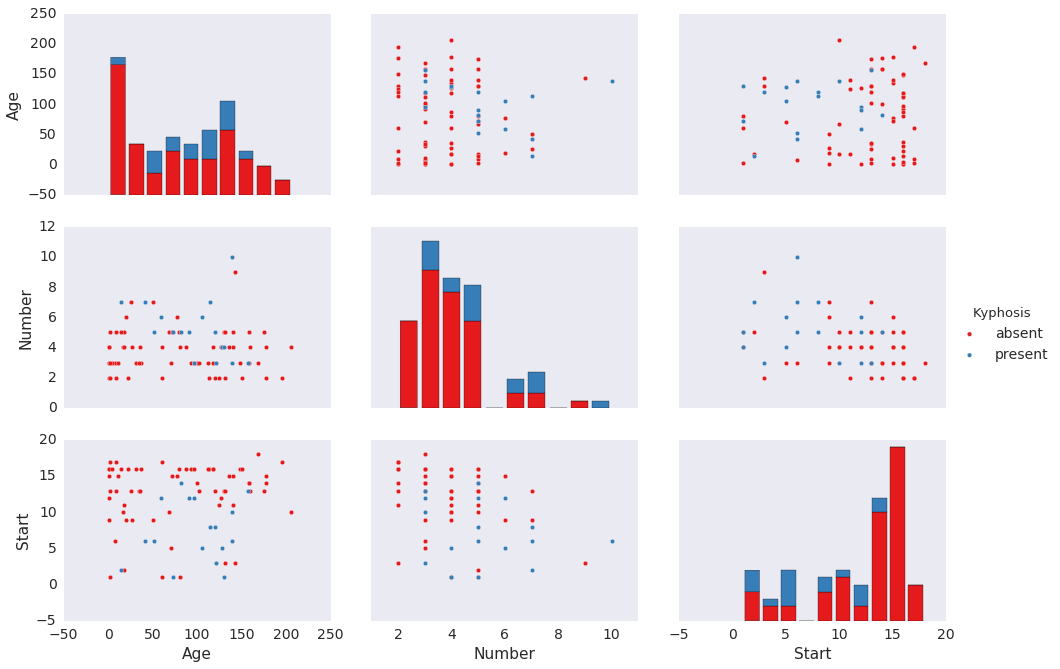

In [5]:
sns.set(context = 'notebook', style = 'dark', font_scale = 1.4)
_ = sns.pairplot(df, hue = 'Kyphosis', size = 3.2, aspect = 1.4, palette = 'Set1')

# The machine-learning process #

It is assumed the observations have been feature-engineered and are available as a single line per observation. It is also assumed that there're separate datasets for the input and output observations.
  
1. Split the data in train and test sets
2. Fit the model using the trainset
3. Evaluate the model on the testset
  
This is the elementary process. Several modifications are used with the object of reducing bias and variance of the trained model.

### 1. Train and test split ###

In [7]:
from sklearn.model_selection import train_test_split

# Separate input and putput observations
X = df.drop('Kyphosis', axis = 1)
y = df['Kyphosis']

# Split to train an test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

### 2. Training the decision tree ###

In [8]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

 ### 3. Model evaluation #

In [9]:
# Apply the trained model to input observations of the test set
predictions = dtree.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Mean misclassification cost (later on this)
print dtree.score(X_test, y_test)

# precision, recall, F-score (later on these)
print(classification_report(y_test, predictions))

__'Actual vs predicted' tabulation:__  
rows refer to __actual__ positive (absent) and negative (present) outcomes.  
columns to __predicted__ positive and negative outcomes.  
  


In [23]:
cmdf = pd.DataFrame(
    confusion_matrix(y_test, predictions), 
    index = pd.Index(['absent', 'present'], name = 'Actuals'),
    columns = pd.Index(['absent', 'present'], name = 'Predictions'))
print cmdf

Predictions  absent  present
Actuals                     
absent           16        5
present           3        1


__This seems to be a rather poor classifier.__  
The performance is moderate on absence and seems to fail dramatically in predicting cases of presense after surgery.  
Is this however the truth? or is it the number of cases too small?

-----------------------------
### Precision, recall and F-score ###

In the test set there 2 values related to each input observation:  
* The actual outcome which in a 2-class problem I label it as **T**(rue) or **F**(alse)  
* and the predicted outcome which I label it as **P**(ositive) or **N**(egative)

From the T, F, P and N values I can construct 4 subsets: 
1. $\mathtt{{T}\bigcap{P}}$ = True Positives
2. $\mathtt{{T}\bigcap{N}}$ = True Negatives
3. $\mathtt{{F}\bigcap{P}}$ = False Positives
4. $\mathtt{{F}\bigcap{N}}$ = False Negatives
  
__Precision__ is defined as $\mathtt{\frac{TP}{T}}$  
__Recall__ is defined as $\mathtt{\frac{TP}{{FN}\bigcup{TP}}}$
  
Note that $\mathtt{{FN}\bigcup{TP}}$ is the predicted truth.  
  
The F-score is a weighted average (geometric mean) of precision and recall.

-------------------------------------------
# Random forest classifier #
Let's employ 100 estimators, constructed by repeatedly __bootstrapping__ the train set.  
The prediction is obtained from the majority vote of the tree predictions 

In [18]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [19]:
rfc_pred = rfc.predict(X_test)

In [4]:
print classification_report(y_test, rfc_pred)

cmdf = pd.DataFrame(
    confusion_matrix(y_test, rfc_pred), 
    index = pd.Index(['absent', 'present'], name = 'Actuals'),
    columns = pd.Index(['absent', 'present'], name = 'Predictions'))
print cmdf

NameError: name 'y_test' is not defined

---------------------------------
# Evaluation Metrics #

## Bootstrapping ###
Bootstrapping is **'sampling with replacement'**  
  
The nice thing with bootstrapping is that, from a set of N observations I can generate many different sets with N observations each.  
Bootstrapped estimations __decrease variance__ because their parameters average over multiple sets.  
The random forest classifier is an example: each tree is trained in a bootstrapped sample of the trainset and the forest decision is an average of the decisions of the trees.

### Mean misclassification cost ###
The average misclassification on output observations: If the test set is $(X_i, y_i), i = 1,...,N$ and $T(X_i)$ the tree prediction on $X_i$  
the average misclassification is  
$$\frac{1}{N} \sum_i I(y_i \ne T(X_i))$$  
where I is the indicator function.

-------------------------------------------------------------
# A simple classifier using Tensorflow #

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('https://www.youtube.com/watch?v=XDAnFZqJDvI&list=PLIivdWyY5sqJxnwJhe3etaK7utrBiPBQ2&index=12')